<a href="https://colab.research.google.com/github/ale22toni/ISPC-Ciencia-de-Datos/blob/main/Examen_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONSIGNAS
Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link
Hacer un fork de este repositorio y trabajar sobre ese archivo
1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver.

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.

INTRODUCCION
Entendiendo que la consigna nos brinda parte de un codigo en el que se utiliza el modelo de aprendizaje Supervisado de clasificacion SVM, elegiremos un set de datos adecuado para trabajar con el mismo. Este set de datos debe tener una variable target a predecir (supervisado) y esta debe ser una etiqueta categorica no continua (clasificacion).

El set de datos elegido contiene 13 variables predictoras y una variable target que clasifica en tres clases distintas (Clase 0, clase 1, clase 2) a los vinos.

Por otra parte tambien aplicamos un modelo de Regresion Logistica Multiple (tambien modelo supervisado de clasificacion) para fialmente hacer una comparacion entre las metricas obtenidas en ambos modelos.

SVM

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Generacion de datos: usaremos las funciones provistas en sklearn
sklearn.datasets: Datasets

In [2]:
# Datos
# ==============================================================================
from sklearn.datasets import load_wine
data = load_wine()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos = data1
datos


,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


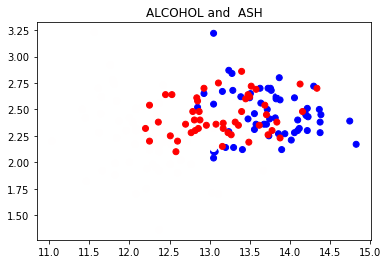

In [3]:
#Vizualizacion de la tres clases segun dos variables predictoras
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.alcohol, datos.ash, c=datos.target);
ax.set_title("ALCOHOL and  ASH");


In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


     

In [5]:
X_train.shape


(142, 13)

In [6]:
X_test.shape


(36, 13)

In [7]:
#Busqueda en grilla de los mejores valores de los siguientes hiperparametros para SVM:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(),
        'params':{
            'C':[1, 0.75, 0.5, 0.25],
            'kernel':['linear']
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [8]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])


,model,best_score,best_params
0,support vector machine,0.96513,"{'C': 1, 'kernel': 'linear'}"


In [9]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 1, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

#PONER CODIGO AQUI


SVC(C=1, kernel='linear', random_state=123)

In [13]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones
#PONER CODIGO AQUI

array([1., 1., 1., 1., 2., 1., 2., 0., 0., 2., 2., 2., 0., 1., 1., 0., 0.,
       2., 2., 2., 0., 1., 1., 2., 1., 2., 1., 0., 0., 1., 0., 2., 1., 1.,
       1., 1.])

In [14]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
#PONER CODIGO AQUI

print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 91.66666666666666%


In [ ]:
#Calculo la precisión del modelo

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
